<a href="https://colab.research.google.com/github/saian65/Neural-Networks/blob/common/PyTorch_SinNet_2%5Ex_sin(2%5E_x).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

учебная нейронка восстанавливающая график синуса

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [ ]:
import numpy as np

def target_func(x):
    left = 2**x_train
    right = np.sin(2**(-x))
    return left*right

In [81]:
#make train dataset
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

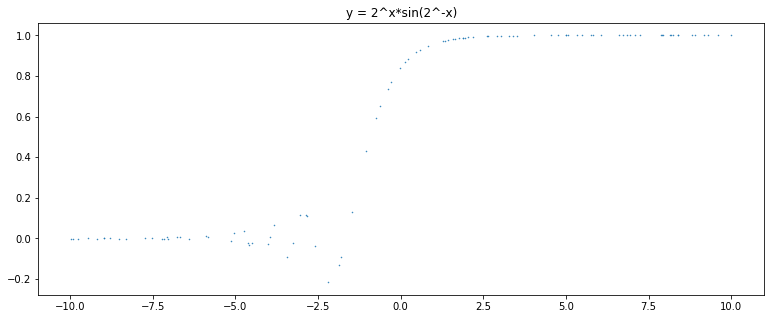

In [83]:
y_train = target_func(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), ".", ms=1)
plt.title('y = 2^x*sin(2^-x)');

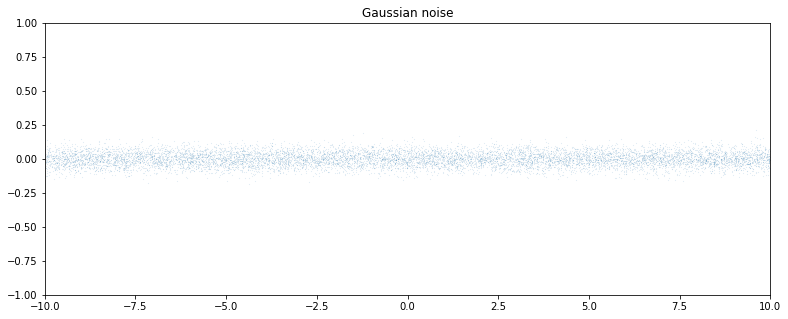

In [ ]:
#add noise from normal distribution
n =  - 500 
noise = torch.randn(y_train.shape)/20

plt.plot(x_train.numpy(), noise.numpy(), '.',ms=0.09)
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

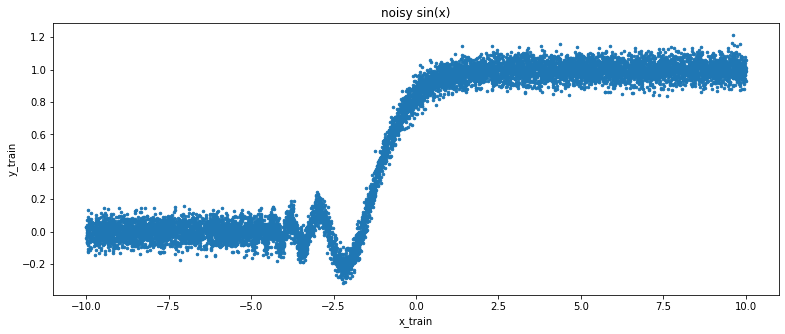

In [ ]:
#конечная обучающая выборка
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), ".", ms=5)
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [ ]:
x_train.shape,y_train.shape

(torch.Size([10000]), torch.Size([10000]))

In [ ]:
#x_train.unsqueeze_(1)
#y_train.unsqueeze_(1);
#x_train.shape,y_train.shape

validation dataset

In [ ]:
# validation dataset
x_validation = torch.rand(10000)
x_validation = x_train * 20.0 - 10.0
y_validation = target_func(x_validation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sin
  """


In [ ]:
x_validation.shape,y_validation.shape

(torch.Size([10000]), torch.Size([10000]))

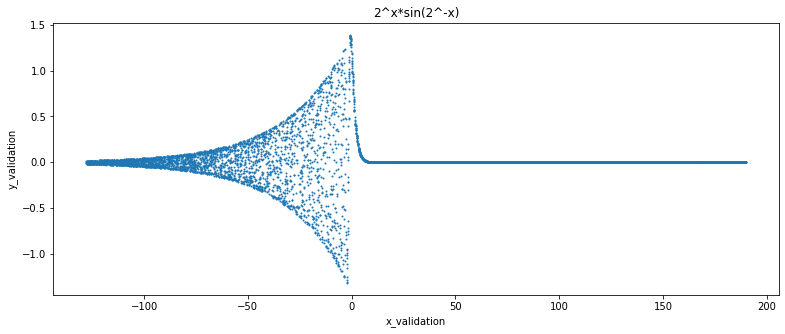

In [ ]:
plt.plot(x_validation.numpy(), y_validation.numpy(), '.',ms=2)
plt.title('2^x*sin(2^-x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

In [ ]:
sine_net = SineNet(10000)

now let's find min of func loss

In [ ]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [ ]:
def loss_RMSE(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

In [ ]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss_RMSE(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

RuntimeError: ignored